In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

raw_police_data = pd.read_csv('police_data/crimes_2012_to_2017.csv')

raw_police_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


# Raw Data
 - We can see that the raw data has a lot of information which to some extend is not really necessary.
 - For example the first column does not provide any meaning. The 'ID', 'Case Number' are also something that we do not
   need for further analysis so we can remove them.


In [2]:
raw_police_data = raw_police_data.loc[:, ~raw_police_data.columns.str.contains('^Unnamed')]
raw_police_data = raw_police_data.drop(columns=['Case Number', 'ID'])
raw_police_data.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [3]:
raw_police_data = raw_police_data.drop(columns=[
    'IUCR','Block', 'Description', 'Location Description', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'Location'])


In [4]:
# The dataset has 1_456_714 data entries lets remove  the null values to see how much will it shrink

raw_police_data = raw_police_data.dropna()

# The result is 1_419_630


In [5]:
# Lets examine the amount of crimes for each year
years = ['2012', '2013', '2014', '2015', '2016']
year_2012 = raw_police_data[raw_police_data["Year"] == 2012]

each_year_crimes = {}
crimes = {}

for year in years:
    each_year_crimes[year] = raw_police_data[raw_police_data["Year"] == int(year)]
    # get the amount of crimes for each year
    crimes[year] = len(each_year_crimes[year].index)


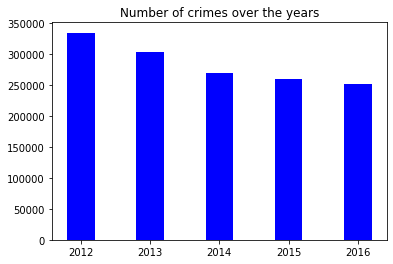

In [6]:
# Plot the amount of crimes for each year in a histogram

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

years = list(crimes.keys())
counts = list(crimes.values())

plt.bar(years, counts, color ='blue',width = 0.4)
plt.title("Number of crimes over the years")
plt.show()


### We can see that the number of crimes over the years is descending based on the reported cases in the datase

In [7]:
# Lets see how the crime is influenced for each month
from datetime import datetime

def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date



# Using apply() of pandas to apply time_convert on every row of the Date column
raw_police_data['Date'] = raw_police_data['Date'].apply(time_convert)

def month(x):
    return x.strftime("%-m")

police_data_with_month = raw_police_data

police_data_with_month['Month'] = police_data_with_month['Date'].apply(month)

In [8]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
crimes_for_each_month = {
    '2012': [],
    '2013': [],
    '2014': [],
    '2015': [],
    '2016': [],
}

# each_year_crimes[year] = raw_police_data[raw_police_data["Year"] == int(year)]
# crimes[year] = len(each_year_crimes[year].index)

for year in years:
    crimes_year = raw_police_data[raw_police_data["Year"] == int(year)]
    for month in months:
        crimes_month = crimes_year[crimes_year["Month"] == str(month)]
        crimes_for_each_month[year].append(len(crimes_month.index))


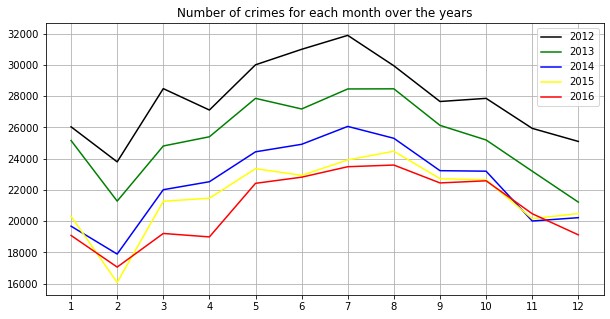

In [9]:
# Plot all crimes for each month from year 2012 to 2016
year_colors = {'2012': 'black', '2013':'green', '2014':'blue', '2015':'yellow', '2016':'red'}

barWidth = 0.2

br1 = [1,2,3,4,5,6,7,8,9,10,11,12]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.rcParams["figure.figsize"] = (10,5)

for year in crimes_for_each_month:
    months = [1,2,3,4,5,6,7,8,9,10,11,12]
    counts = list(crimes_for_each_month[year])

    plt.plot(br1, counts, color=year_colors[year], label=year)
    plt.title("Number of crimes for each month over the years")
    plt.legend()
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    plt.grid()

plt.show()





In [10]:
import ciso8601
import time


def convert_to_timestamp(x):
    # ts = pd.Timestamp(x)
    # ts = ts.normalize()
    x = x.strftime("%Y-%m-%d")
    ts = ciso8601.parse_datetime(x)
    # to get time in seconds:
    return time.mktime(ts.timetuple())
# With hours !
police_data_with_month['Timestamp'] = police_data_with_month['Date'].apply(convert_to_timestamp)

police_data_with_month

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Month,Timestamp
0,2016-05-03 23:40:00,BATTERY,True,True,10.0,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,5,1.462226e+09
1,2016-05-03 21:40:00,BATTERY,False,True,3.0,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,5,1.462226e+09
2,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,False,False,15.0,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,5,1.462226e+09
3,2016-05-03 22:10:00,BATTERY,False,False,15.0,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,5,1.462226e+09
4,2016-05-03 22:00:00,THEFT,False,True,15.0,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,5,1.462226e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,2016-05-03 23:33:00,BATTERY,True,True,10.0,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,5,1.462226e+09
1456710,2016-05-03 23:30:00,CRIMINAL DAMAGE,True,True,7.0,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,5,1.462226e+09
1456711,2016-05-03 00:15:00,BATTERY,False,False,8.0,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,5,1.462226e+09
1456712,2016-05-03 21:07:00,BATTERY,False,True,4.0,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,5,1.462226e+09


<function matplotlib.pyplot.show(close=None, block=None)>

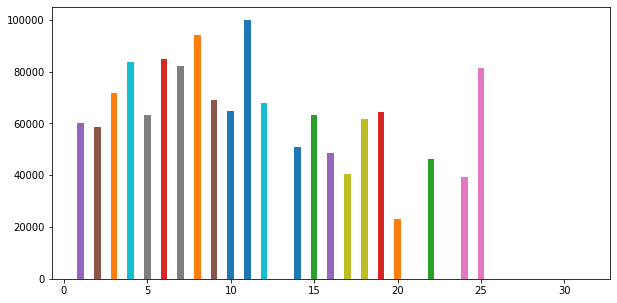

In [11]:
police_data_with_month

disctrict = {}

disct = police_data_with_month['District'].unique()

for d in disct:
    disctrict[d] = len(police_data_with_month[police_data_with_month['District'] == d].index)
    
for d in disct:
    plt.bar(d, disctrict[d], width = 0.4)

plt.show

In [12]:
test_df = police_data_with_month[police_data_with_month['Year'] == 2016]
test_df

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Month,Timestamp
0,2016-05-03 23:40:00,BATTERY,True,True,10.0,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,5,1.462226e+09
1,2016-05-03 21:40:00,BATTERY,False,True,3.0,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,5,1.462226e+09
2,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,False,False,15.0,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,5,1.462226e+09
3,2016-05-03 22:10:00,BATTERY,False,False,15.0,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,5,1.462226e+09
4,2016-05-03 22:00:00,THEFT,False,True,15.0,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,5,1.462226e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,2016-05-03 23:33:00,BATTERY,True,True,10.0,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,5,1.462226e+09
1456710,2016-05-03 23:30:00,CRIMINAL DAMAGE,True,True,7.0,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,5,1.462226e+09
1456711,2016-05-03 00:15:00,BATTERY,False,False,8.0,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,5,1.462226e+09
1456712,2016-05-03 21:07:00,BATTERY,False,True,4.0,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,5,1.462226e+09


In [13]:
test_df = test_df[['Timestamp', 'District', 'Primary Type']]

# lets examine the primary types - non-Parametric values nominal
test_df['Primary Type'].value_counts()

THEFT                                58329
BATTERY                              48686
CRIMINAL DAMAGE                      30189
ASSAULT                              18080
OTHER OFFENSE                        15911
DECEPTIVE PRACTICE                   14049
BURGLARY                             13613
ROBBERY                              11611
MOTOR VEHICLE THEFT                  11005
NARCOTICS                            10664
CRIMINAL TRESPASS                     6209
WEAPONS VIOLATION                     3398
OFFENSE INVOLVING CHILDREN            1953
PUBLIC PEACE VIOLATION                1579
CRIM SEXUAL ASSAULT                   1267
INTERFERENCE WITH PUBLIC OFFICER       926
PROSTITUTION                           780
SEX OFFENSE                            770
HOMICIDE                               749
ARSON                                  504
LIQUOR LAW VIOLATION                   210
KIDNAPPING                             193
GAMBLING                               188
STALKING   

In [14]:
# lets examine the districts - non-parametric values nominal
test_df['District'].value_counts() 

11.0    17181
8.0     16504
6.0     15235
4.0     13959
25.0    13716
12.0    13209
7.0     13074
1.0     12800
18.0    12329
9.0     11915
10.0    11848
3.0     11569
19.0    11413
5.0     10807
15.0    10661
2.0     10604
14.0     9689
16.0     8500
22.0     8030
17.0     7304
24.0     6827
20.0     4096
31.0        3
Name: District, dtype: int64

In [15]:
test_df['Timestamp'].value_counts()

1.469830e+09    874
1.472422e+09    854
1.467670e+09    847
1.469484e+09    832
1.471385e+09    829
               ... 
1.455491e+09    492
1.453072e+09    491
1.481411e+09    481
1.455404e+09    473
1.482620e+09    463
Name: Timestamp, Length: 366, dtype: int64

In [16]:
test_df = test_df.groupby(['Timestamp', 'District'], as_index=False).agg({"Primary Type":"count"})
test_df.head()

,Timestamp,District,Primary Type
0,1.451603e+09,1.0,28
1,1.451603e+09,2.0,27
2,1.451603e+09,3.0,22
3,1.451603e+09,4.0,39
4,1.451603e+09,5.0,25


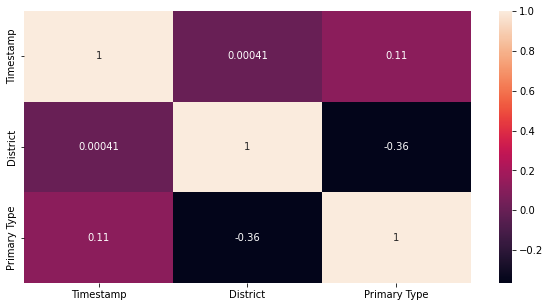

In [17]:
import seaborn as sn

corrMatrix = test_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
# Hmm seems we do not have any correletaion :D

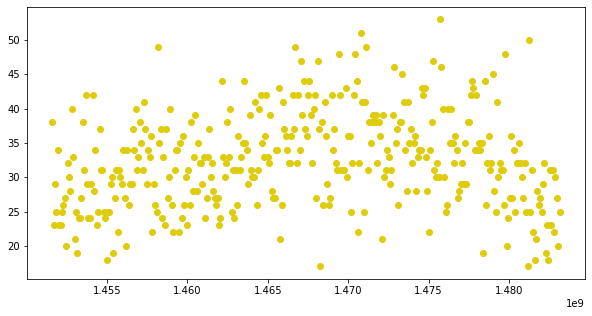

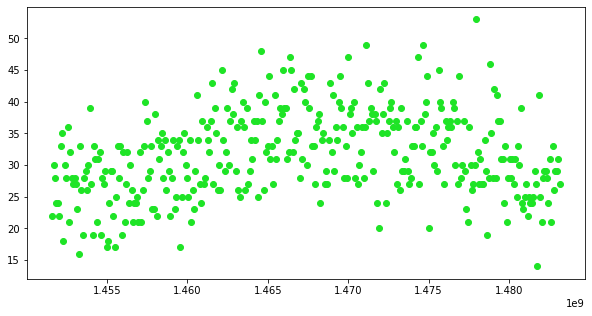

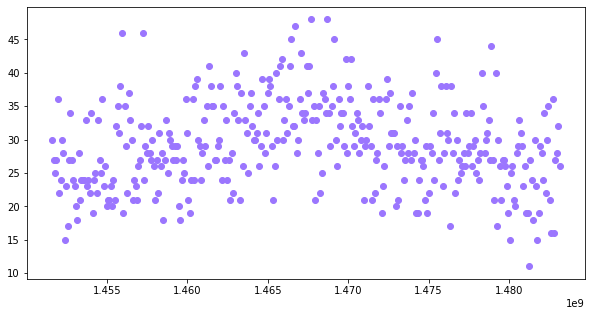

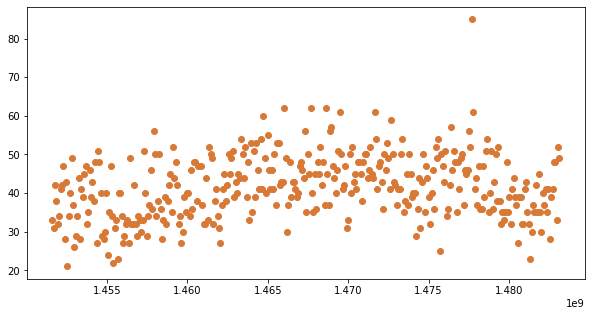

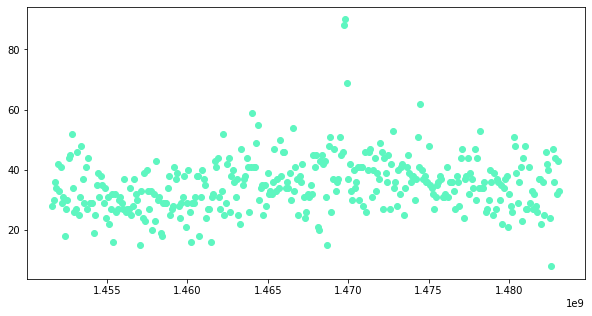

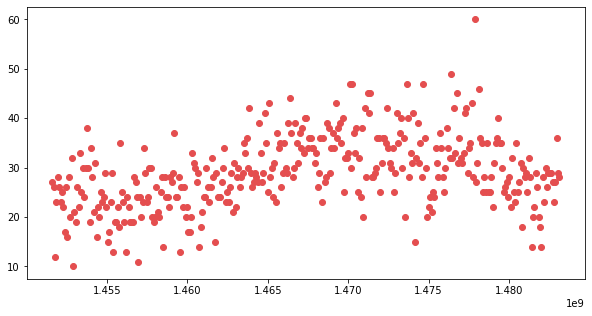

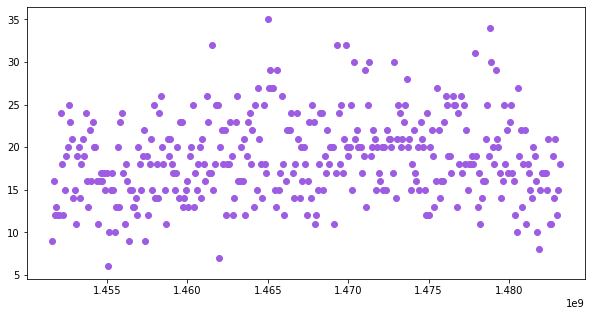

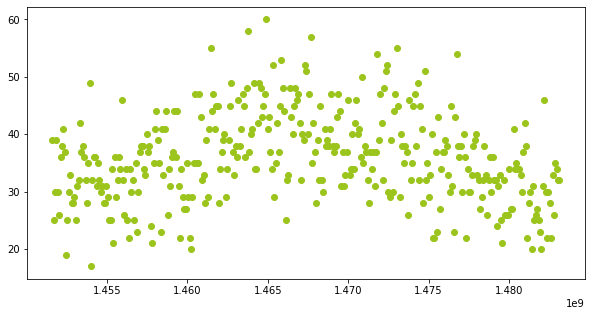

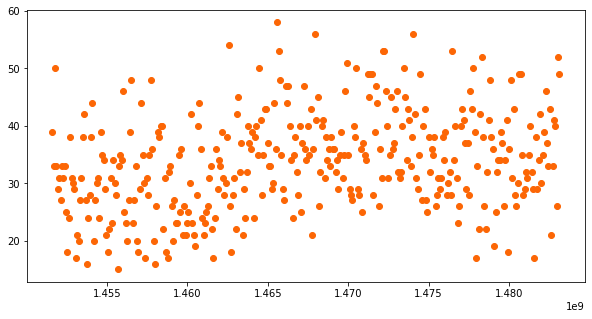

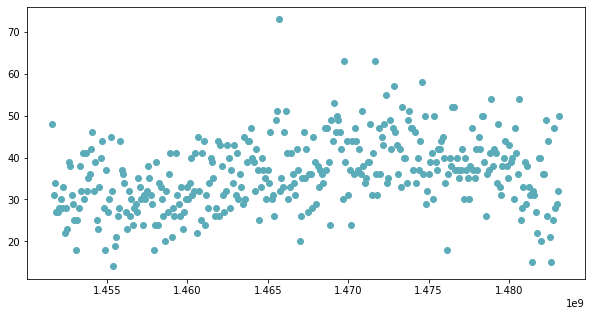

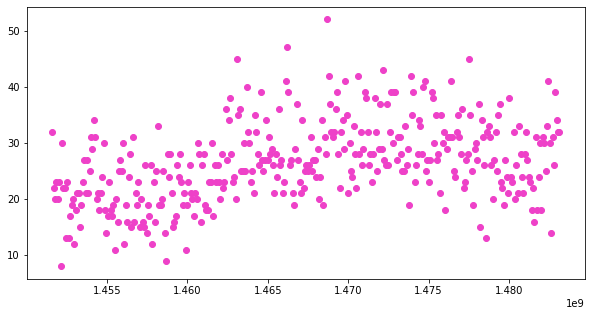

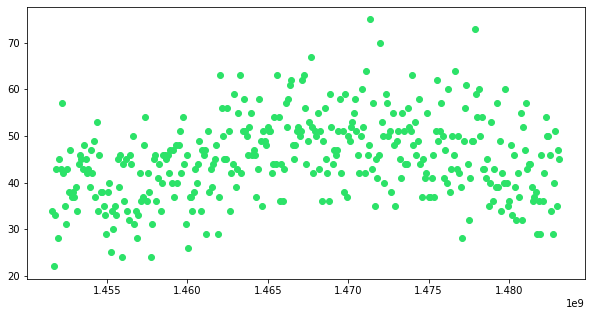

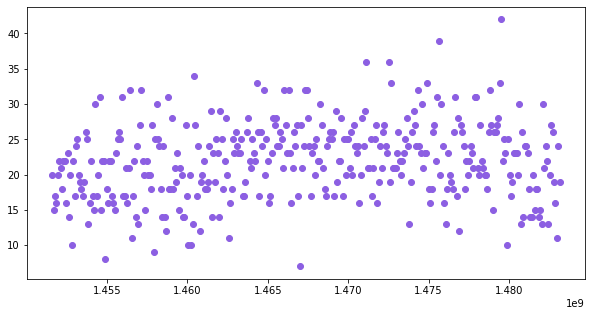

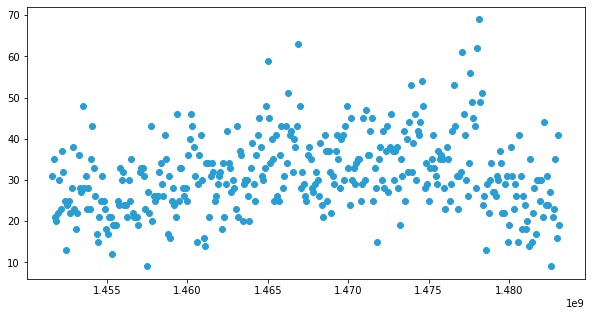

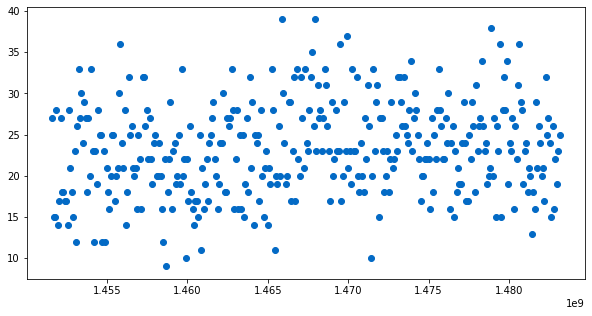

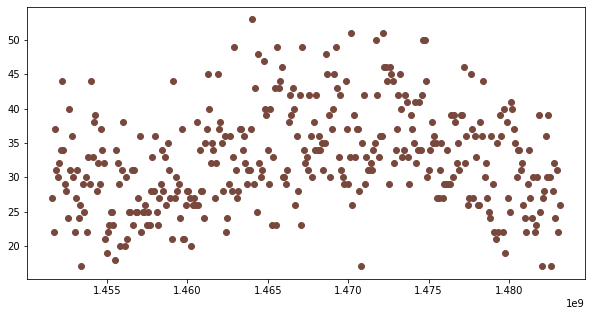

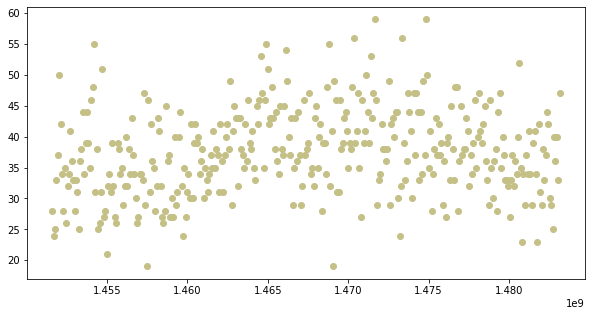

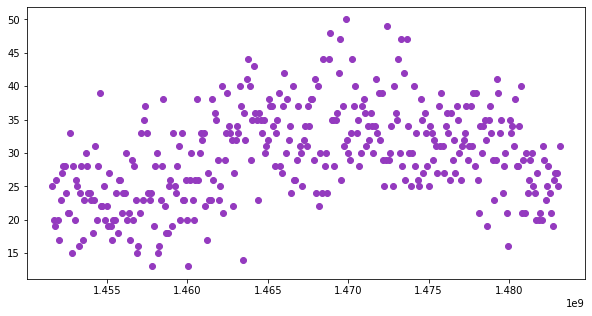

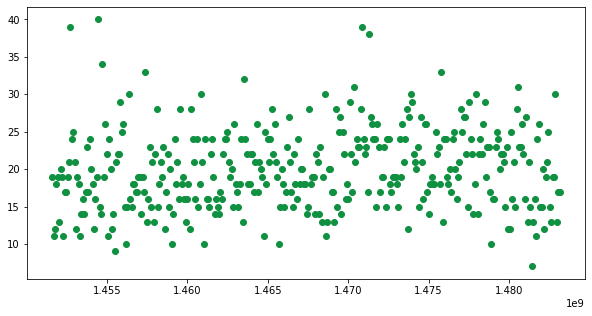

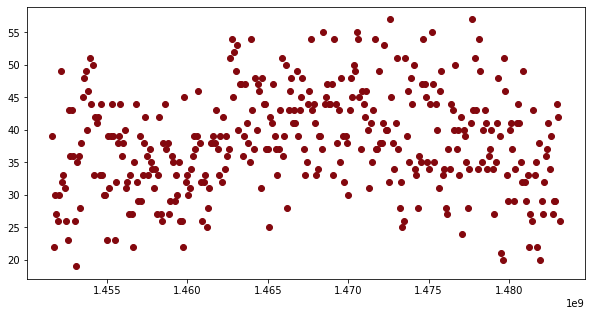

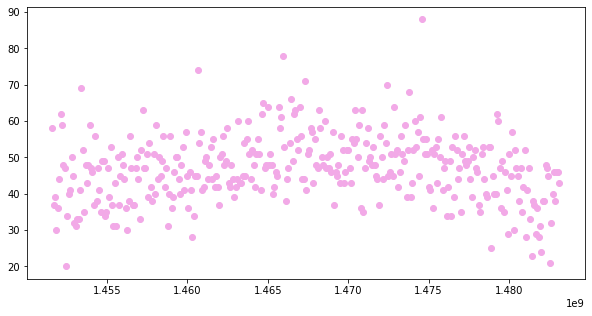

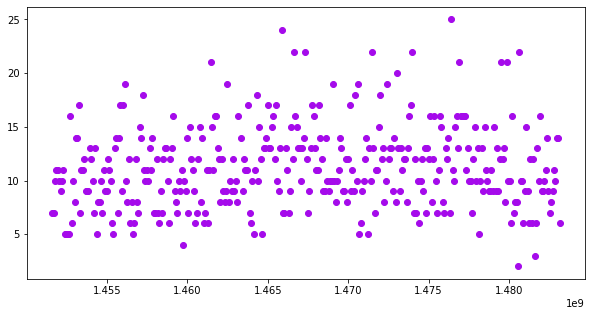

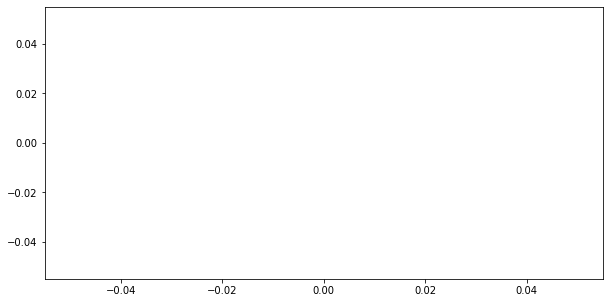

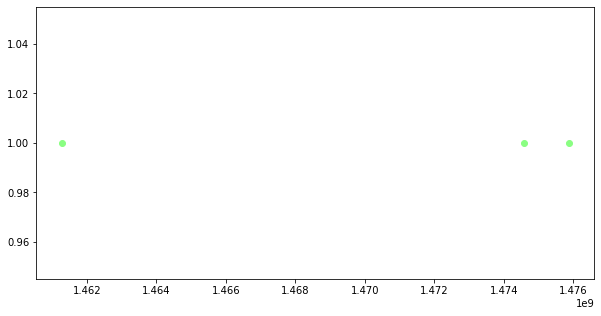

In [37]:
# See the data points
import random

for d in disct:
    color = (random.random(), random.random(), random.random())
    time = test_df[test_df['District'] == d]
    crimes = test_df[test_df['District'] == d]
    plt.plot(time['Timestamp'], crimes['Primary Type'], 'o', color=color, label=d)
    plt.show()
plt.show()

In [27]:
print(test_df.describe())

# The mean for the primary type is 1.995, we can classify that as low crime rate so 2 will be the threshold

def classify_crime(x):
    if (x <= 15):
        return 0
    elif(x > 15 and x < 30):
        return 1
    elif(x > 30 and x <45):
        return 2
    elif(x > 45 and x <60):
        return 3
    elif(x > 60 and x < 75):
        return 4
    elif(x > 75 and x < 90 ):
        return 5
    elif(x > 105 and x < 120):
        return 6
    else:
        return 7

test_df['status'] = test_df['Primary Type'].apply(classify_crime)
test_df = test_df[['Timestamp','District','Primary Type','status']]

average = test_df['Primary Type']

          Timestamp     District  Primary Type       status
count  8.054000e+03  8054.000000   8054.000000  8054.000000
mean   1.467370e+09    12.187857     31.198535     1.829402
std    9.128731e+06     7.147371     11.238502     1.432777
min    1.451603e+09     1.000000      1.000000     0.000000
25%    1.459462e+09     6.000000     23.000000     1.000000
50%    1.467410e+09    12.000000     31.000000     2.000000
75%    1.475273e+09    18.000000     39.000000     2.000000
max    1.483139e+09    31.000000     90.000000     7.000000


,Timestamp,District,Primary Type,status
0,1.451603e+09,1.0,28,1
1,1.451603e+09,2.0,27,1
2,1.451603e+09,3.0,22,1
3,1.451603e+09,4.0,39,2
4,1.451603e+09,5.0,25,1
...,...,...,...,...
8049,1.483139e+09,19.0,19,1
8050,1.483139e+09,20.0,6,0
8051,1.483139e+09,22.0,19,1
8052,1.483139e+09,24.0,18,1


In [21]:
# Using Decision Trees for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

X = test_df[['Timestamp','District']] # independent
y = test_df['status'] # dependent

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75:25 split

print(X_train)
# print('hi')
# print(X_test)
# Creating tree
d_tree = DecisionTreeClassifier(random_state=10)
# Fitting tree
d_tree = d_tree.fit(X_train, y_train)
# Predicting !
y_pred = d_tree.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2])))

         Timestamp  District
7671  1.481670e+09      15.0
7882  1.482534e+09       5.0
2434  1.461103e+09      16.0
3521  1.465423e+09       2.0
1077  1.455750e+09      25.0
...            ...       ...
7935  1.482707e+09      15.0
5192  1.471990e+09       1.0
3980  1.467151e+09      24.0
235   1.452467e+09      17.0
5157  1.471817e+09      10.0

[6040 rows x 2 columns]
Accuracy: 50.198609731876864 


----------Confusion Matrix------------------------------------
Predicted Alarm   0    1    2   3  4  5   7
Actual Alarm                               
0                70   67    6   0  0  0   6
1                57  465  199  13  0  0  32
2                 7  195  408  98  3  0  46
3                 0    7  115  64  6  1  11
4                 0    0    4   8  1  0   3
5                 0    0    0   0  1  0   0
7                 2   42   57  17  0  0   3

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0

In [22]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss="hinge", penalty="l2", max_iter=100_000_000)

sgdc.fit(X_train, y_train)

predictions = sgdc.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, predictions)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, predictions, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test, predictions))

# Unweighted Average Recall
#print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2])))


Accuracy: 0.7944389275074478 


----------Confusion Matrix------------------------------------
Predicted Alarm    4
Actual Alarm        
0                149
1                766
2                757
3                204
4                 16
5                  1
7                121

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.00      0.00      0.00       766
           2       0.00      0.00      0.00       757
           3       0.00      0.00      0.00       204
           4       0.01      1.00      0.02        16
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00       121

    accuracy                           0.01      2014
   macro avg       0.00      0.14      0.00      2014
weighted avg       0.00      0.01      0.00      2014



/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

In [23]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test, y_pred))


Accuracy: 37.58689175769613 


----------Confusion Matrix------------------------------------
Predicted Alarm    2
Actual Alarm        
0                149
1                766
2                757
3                204
4                 16
5                  1
7                121

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.00      0.00      0.00       766
           2       0.38      1.00      0.55       757
           3       0.00      0.00      0.00       204
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00       121

    accuracy                           0.38      2014
   macro avg       0.05      0.14      0.08      2014
weighted avg       0.14      0.38      0.21      2014



/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anton/Documents/Project_Repositories/chicago_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

In [24]:

from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
from sklearn.metrics import r2_score

X = test_df[['Timestamp', 'District']] # independent
y = test_df['Primary Type'] # dependent

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75:25 split

reg.fit(X_train, y_train)


reg.coef_

y_predic = reg.predict(X_test)

print(reg.score(X, y))


0.14526932736110276
